In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
metadata = [
  ("/Users/matheusmota/src/github/msc/msc-proj/data/experiments/exp_20251029_013336/experiment_results.csv", 0.50),
  ("/Users/matheusmota/src/github/msc/msc-proj/data/experiments/exp_20251029_014533/experiment_results.csv", 0.75),
  ("/Users/matheusmota/src/github/msc/msc-proj/data/experiments/exp_20251029_020216/experiment_results.csv", 1.00),
]

In [143]:
all_data = []
for filepath, perc in metadata:
  df = pd.read_csv(filepath)
  df['percentual_usado'] = perc
  all_data.append(df)

df = pd.concat(all_data, ignore_index=True)

df = df.rename(columns={
  'execution_time_minutes': 'tempo_exec_minutos',
  'peak_memory_mb': 'memoria_pico_mb',
  'average_memory_mb': 'memoria_media_mb',
  'peak_cpu_percent': 'cpu_pico_percentual',
  'average_cpu_percent': 'cpu_medio_percentual',
})

In [144]:
cols_map = {
  'tempo_exec_minutos': 'T (min)', # Tempo de execução
  'memoria_pico_mb': 'Memória Pico (MB)',
  'memoria_media_mb': 'Memória Média (MB)',
  'cpu_pico_percentual': 'CPU Pico (\\%)',
  'cpu_medio_percentual': 'CPU Médio (\\%)',
  'true_positives': 'TP',
  'false_positives': 'FP',
  'true_negatives': 'TN',
  'false_negatives': 'FN',
  'total_positives': 'P',
  'total_negatives': 'N',
  'precision': 'Precisão',
  'recall': 'recall',
  'f2_score': 'f2_score',
  'wss95': '$WSS@95\\%$',
  'throughput_samples_per_second': 'TS (amostras/s)',
  'average_latency_ms': 'L (ms)', # Latência média
  'data_loading_time_ms': 'TC (ms)', # Tempo de carregamento dos dados
  'experiment_name': 'Experimento',
  'perencial_usado': 'U (\\%)',
  'memory_efficiency': 'Eficiência de Memória',
  'cpu_efficiency': 'Eficiência de CPU',
  'energy_efficiency_score': 'Eficiência Energética',
  'percentual_usado': 'U (\\%)'
}

df_latex = df.rename(columns=cols_map)

group_map = {
  "Descrição": [cols_map["experiment_name"], cols_map["tempo_exec_minutos"]],
  "Métricas de Classificação": [
      cols_map["true_positives"], cols_map["false_positives"], cols_map["true_negatives"], cols_map["false_negatives"], cols_map["total_positives"], cols_map["total_negatives"], cols_map["precision"], cols_map["recall"], cols_map["f2_score"], cols_map["wss95"]
  ],
  "Uso de Memória": [cols_map["memoria_pico_mb"], cols_map["memoria_media_mb"]],
  "Uso de CPU": [cols_map["cpu_pico_percentual"], cols_map["cpu_medio_percentual"]],
  "Eficiência de Tempo": [
      cols_map["throughput_samples_per_second"], cols_map["average_latency_ms"], cols_map["data_loading_time_ms"]
  ],
  "Eficiências": [cols_map["memory_efficiency"], cols_map["cpu_efficiency"], cols_map["energy_efficiency_score"]],
  "Percentual de Dados Usados": [cols_map["percentual_usado"]]
}

In [145]:
import numbers

header_1 = []
header_2 = []
for supercol, subcols in group_map.items():
    header_1.append(r"\multicolumn{%d}{c}{%s}" % (len(subcols), supercol))
    header_2.extend([col.replace('_', r'\_') for col in subcols])

# Gerar tabela em LaTeX
colspec = "|" + "|".join([r"m{1.7cm}"]*len(header_2)) + "|"

table_latex = []

table_latex = []
table_latex.append(r"\resizebox{\textwidth}{!}{%")
table_latex.append(r"\begin{tabular}{%s}" % colspec)
table_latex.append(r"\hline")
table_latex.append(" & ".join(header_1) + r" \\")
table_latex.append(" & ".join(header_2) + r" \\")
table_latex.append(r"\hline")

for i, row in df_latex.iterrows():
    vals = []
    for grupo in group_map.values():
        for col in grupo:
            # val = row[col]
            # val = "" if pd.isnull(val) else val
            # vals.append(str(val))
            val = row[col]
            if pd.isnull(val):
                vals.append("")
            elif isinstance(val, numbers.Number):
                vals.append(f"{val:.2f}")
            else:
                vals.append(str(val))
    table_latex.append(" & ".join(vals) + r" \\")

table_latex.append(r"\hline")
table_latex.append(r"\end{tabular}")
table_latex.append(r"}")

print("\n".join(table_latex))

\resizebox{\textwidth}{!}{%
\begin{tabular}{|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|m{1.7cm}|}
\hline
\multicolumn{2}{c}{Descrição} & \multicolumn{10}{c}{Métricas de Classificação} & \multicolumn{2}{c}{Uso de Memória} & \multicolumn{2}{c}{Uso de CPU} & \multicolumn{3}{c}{Eficiência de Tempo} & \multicolumn{3}{c}{Eficiências} & \multicolumn{1}{c}{Percentual de Dados Usados} \\
Experimento & T (min) & TP & FP & TN & FN & P & N & Precisão & recall & f2\_score & $WSS@95\%$ & Memória Pico (MB) & Memória Média (MB) & CPU Pico (\%) & CPU Médio (\%) & TS (amostras/s) & L (ms) & TC (ms) & Eficiência de Memória & Eficiência de CPU & Eficiência Energética & U (\%) \\
\hline
SVM with GloVe and TF-IDF & 0.23 & 4.00 & 196.00 & 0.00 & 0.00 & 200.00 & 0.00 & 0.02 & 1.00 & 0.09 & -0.05 & 3238.34 & 2931.58 & 98.40 & 21.45 & 14.81 & 0.00 & 0.00 & 0

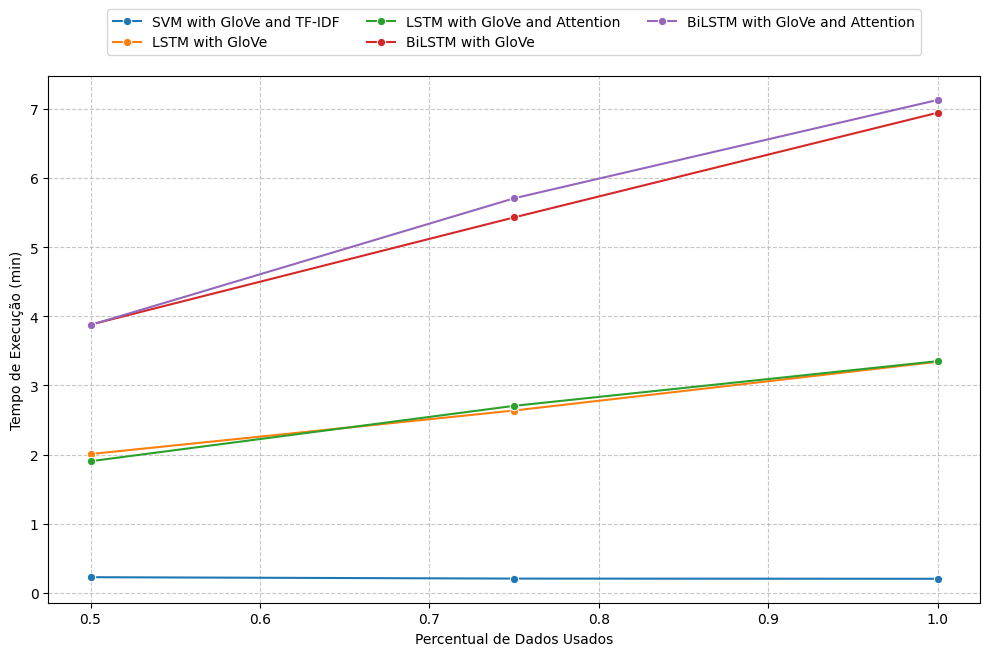

In [146]:
# Gráfico: tempo de execução vs percentual de dados
label = 'Experimento'
df1 = df.rename(columns={'experiment_name': label})

plt.figure(figsize=(10,6))
sns.lineplot(data=df1, x='percentual_usado', y='tempo_exec_minutos', hue=label, marker='o')
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Tempo de Execução (min)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.14),
    ncol=3,
    frameon=True
)
plt.savefig('05a_Duracao_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05a_Duracao_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


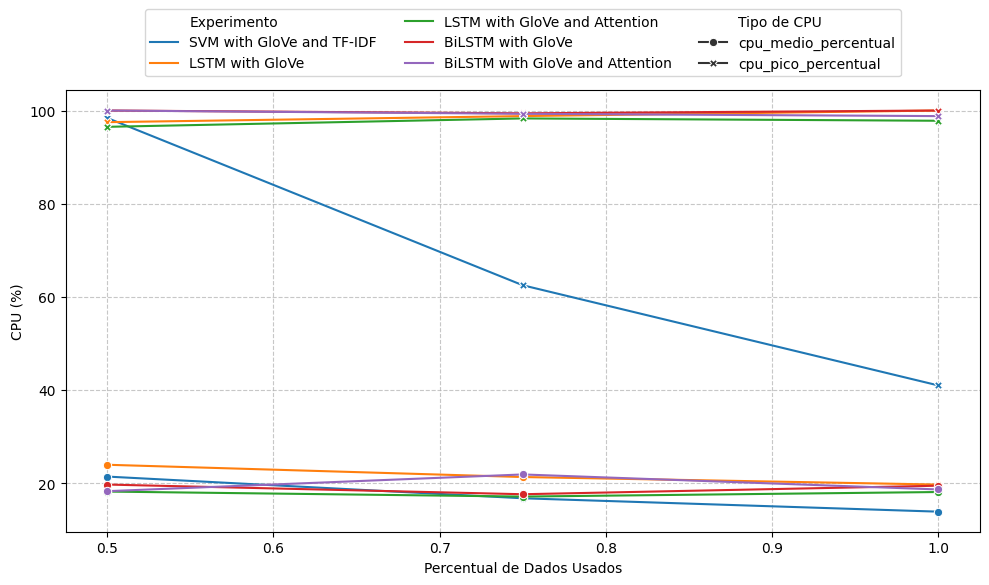

In [147]:
# Gráfico: uso de CPU médio e pico
label = 'Experimento'
label_tipo_cpu = 'Tipo de CPU'
label_cpu_percentual = 'Percentual de CPU'

cpu_df = df.melt(
    id_vars=['percentual_usado', 'experiment_name'],
    value_vars=['cpu_medio_percentual', 'cpu_pico_percentual'],
    var_name='tipo_cpu',
    value_name='cpu_percentual'
)

cpu_df = cpu_df.rename(columns={'experiment_name': label, 'tipo_cpu': label_tipo_cpu, 'cpu_percentual': label_cpu_percentual})

plt.figure(figsize=(10,6))
sns.lineplot(
    data=cpu_df,
    x='percentual_usado',
    y=label_cpu_percentual,
    hue=label,
    style=label_tipo_cpu,
    markers=True,
    dashes=False
)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.20),
    ncol=3,
    frameon=True
)
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('CPU (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('05b_Uso_Medio_CPU_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05b_Uso_Medio_CPU_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


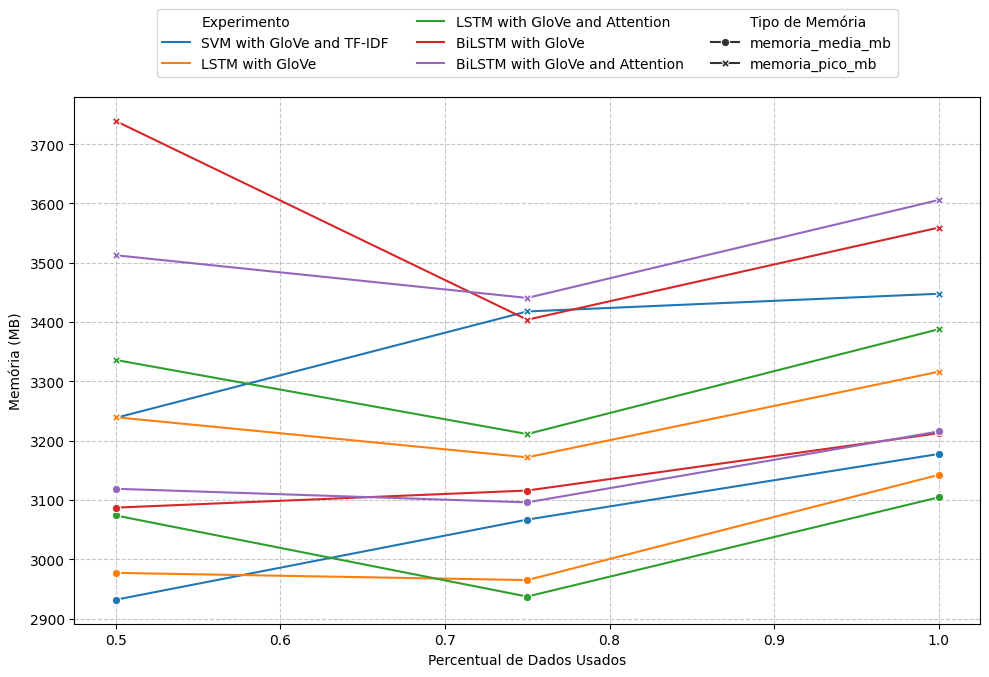

In [148]:
# Gráfico: uso de memória médio e pico
label = 'Experimento'
label_tipo_memoria = 'Tipo de Memória'
label_memoria_mb = 'Memória (MB)'

mem_df = df.melt(
    id_vars=['percentual_usado', 'experiment_name'],
    value_vars=['memoria_media_mb', 'memoria_pico_mb'],
    var_name='tipo_memoria',
    value_name='memoria_mb'
)

mem_df = mem_df.rename(columns={'experiment_name': label, 'tipo_memoria': label_tipo_memoria, 'memoria_mb': label_memoria_mb})

plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=mem_df,
    x='percentual_usado',
    y=label_memoria_mb,
    hue=label,
    style=label_tipo_memoria,
    markers=True,
    dashes=False
)
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Memória (MB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=3,
    frameon=True
)

plt.savefig('05c_Memoria_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05c_Memoria_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()



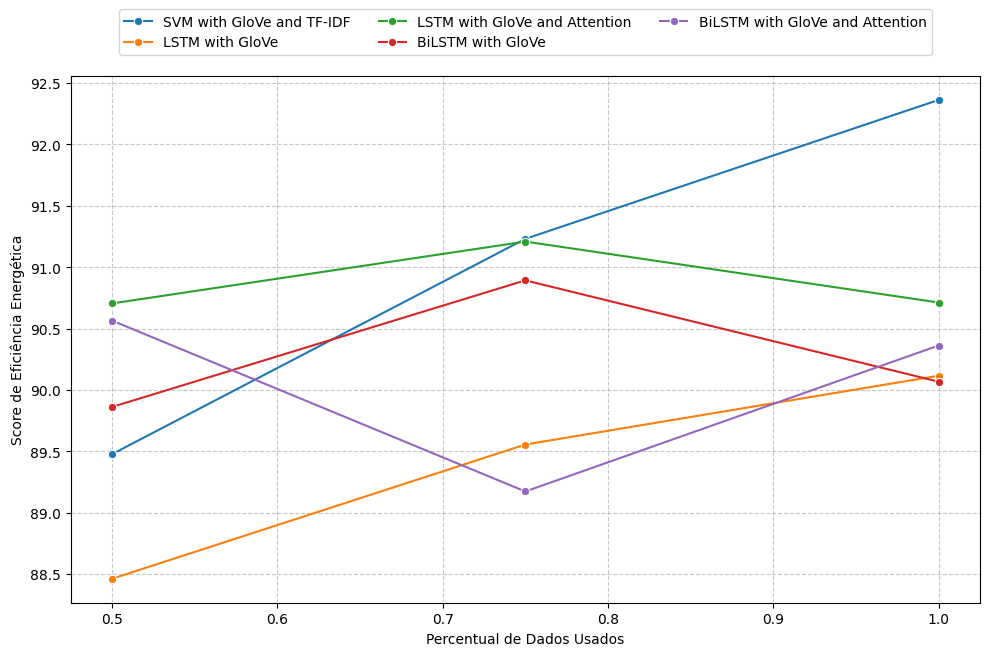

In [149]:

# Gráfico: eficiência energética do experimento
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='percentual_usado', y='energy_efficiency_score', hue='experiment_name', marker='o')
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Score de Eficiência Energética')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.14),
    ncol=3,
    frameon=True
)

plt.savefig('05d_Eficiencia_Energetica_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05d_Eficiencia_Energetica_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


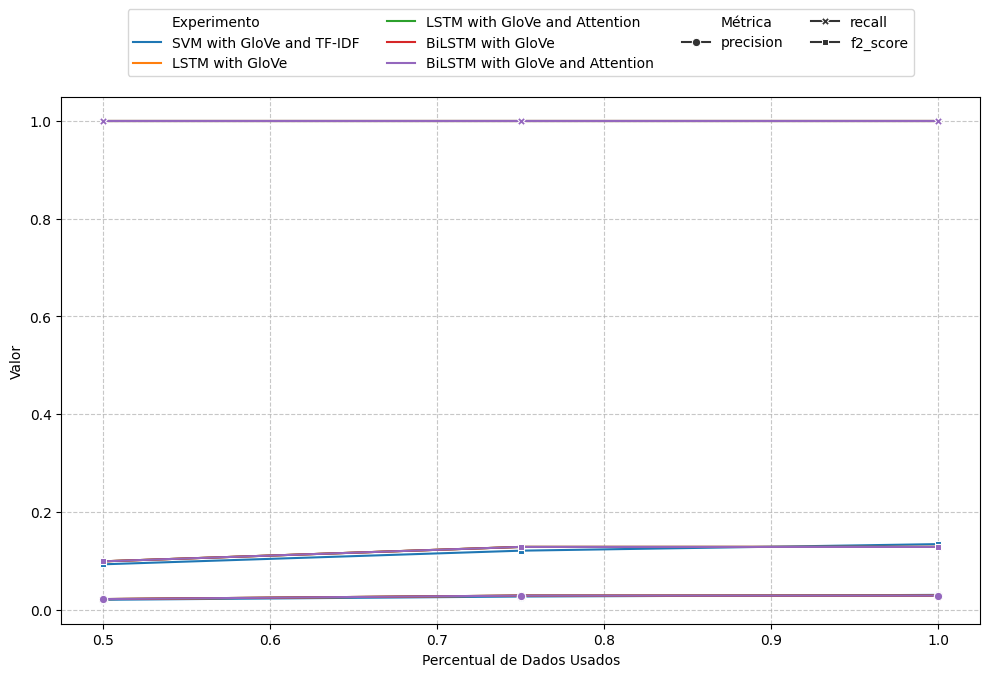

In [150]:
# Gráfico: precisão, recall e F2 score
label = 'Experimento'
label_metrica = 'Métrica'
label_valor = 'Valor'

long_df = df.melt(
    id_vars=['percentual_usado', 'experiment_name'],
    value_vars=['precision', 'recall', 'f2_score'],
    var_name='métrica',
    value_name='valor'
)

long_df = long_df.rename(columns={'experiment_name': label, 'métrica': label_metrica, 'valor': label_valor})

plt.figure(figsize=(10,6))
sns.lineplot(
    data=long_df,
    x='percentual_usado',
    y=label_valor,
    hue=label,
    style=label_metrica,
    markers=True,
    dashes=False
)
plt.xlabel('Percentual de Dados Usados')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=4,
    frameon=True
)

plt.savefig('05e_Metricas_Dados_Usados.svg', format='svg', bbox_inches='tight')
plt.savefig('05e_Metricas_Dados_Usados.jpg', format='jpg', bbox_inches='tight')
plt.show()


In [151]:
import platform
import psutil
import os
import subprocess

# Sistema Operacional
so = platform.system()
versao = platform.version()
release = platform.release()
arquitetura = platform.machine()

# Processador
cpu = platform.processor()
nucleos_fisicos = psutil.cpu_count(logical=False)
nucleos_logicos = psutil.cpu_count(logical=True)
freq = psutil.cpu_freq()

# Memória
mem = psutil.virtual_memory()

# Disco
disco = psutil.disk_usage('/')

# GPU (pouco suporte em Mac, mas tenta via system_profiler)
def get_gpu():
    try:
        output = subprocess.check_output(['system_profiler', 'SPDisplaysDataType'])
        return output.decode()
    except Exception:
        return 'Não disponível'

# Exibir resultados
print(f"Sistema: {so}\nVersão: {release}\nArquitetura: {arquitetura}")
print(f"Processador: {cpu}\nNúcleos físicos: {nucleos_fisicos}\nNúcleos lógicos: {nucleos_logicos}")
if freq:
    print(f"Frequência atual: {freq.current:.2f} MHz")
print(f"Memória total: {mem.total/2**30:.2f} GB")
print(f"Disco total: {disco.total/2**30:.2f} GB, Livre: {disco.free/2**30:.2f} GB")
print(f"GPU: {get_gpu()}")


Sistema: Darwin
Versão: 24.6.0
Arquitetura: arm64
Processador: arm
Núcleos físicos: 8
Núcleos lógicos: 8
Frequência atual: 3204.00 MHz
Memória total: 8.00 GB
Disco total: 228.27 GB, Livre: 8.70 GB
GPU: Graphics/Displays:

    Apple M1:

      Chipset Model: Apple M1
      Type: GPU
      Bus: Built-In
      Total Number of Cores: 7
      Vendor: Apple (0x106b)
      Metal Support: Metal 3
      Displays:
        Color LCD:
          Display Type: Built-In Retina LCD
          Resolution: 2560 x 1600 Retina
          Main Display: Yes
          Mirror: Off
          Online: Yes
          Automatically Adjust Brightness: Yes
          Connection Type: Internal




In [176]:
SOURCE_INPUT_FILES = [
  ("UrinaryIncontinence.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/UrinaryIncontinence.csv"),
  ("Hall_2012.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Hall_2012.csv"),
  ("ProtonPumpInhibitors.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/ProtonPumpInhibitors.csv"),
  ("van_de_Schoot_2017.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/van_de_Schoot_2017/output/van_de_Schoot_2017.csv"),
  ("SkeletalMuscleRelaxants.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/SkeletalMuscleRelaxants.csv"),
  ("Kwok_2020.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Kwok_2020/output/Kwok_2020.csv"),
  ("Nagtegaal_2019.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Nagtegaal_2019/output/Nagtegaal_2019.csv"),
  ("Wolters_2018.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Wolters_2018/output/Wolters_2018.csv"),
  ("Kitchenham_2010.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Kitchenham_2010.csv"),
  ("Radjenovic_2013.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Radjenovic_2013.csv"),
  ("Triptans.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Triptans.csv"),
  ("Wahono_2015.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Hall_Wahono_Radjenovic_Kitchenham/output/Wahono_2015.csv"),
  ("Statins.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Statins.csv"),
  ("van_Dis_2020.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/van_Dis_2020/output/van_Dis_2020.csv"),
  ("ADHD.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/ADHD.csv"),
  ("ACEInhibitors.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/ACEInhibitors.csv"),
  ("Opiods.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Opiods.csv"),
  ("AtypicalAntipsychotics.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/AtypicalAntipsychotics.csv"),
  ("CalciumChannelBlockers.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/CalciumChannelBlockers.csv"),
  ("BetaBlockers.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/BetaBlockers.csv"),
  ("NSAIDS.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/NSAIDS.csv"),
  ("Bannach-Brown_2019.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Bannach-Brown_2019/output/Bannach-Brown_2019.csv"),
  ("Appenzeller-Herzog_2020.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Appenzeller-Herzog_2020/output/Appenzeller-Herzog_2020.csv"),
  ("OralHypoglycemics.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/OralHypoglycemics.csv"),
  ("Antihistamines.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Antihistamines.csv"),
  ("Bos_2018.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Bos_2018/output/Bos_2018.csv"),
  ("Estrogens.csv", "/Users/matheusmota/src/github/msc/systematic-review-datasets/datasets/Cohen_2006/output/local/Estrogens.csv"),
]

In [177]:
RELATIVE_PREFIX = "/Users/matheusmota/src/github/msc/systematic-review-datasets/"
GITHUB_RELATIVE_PREFIX = "https://github.com/reginaofori/systematic-review-datasets/tree/master/datasets"

In [178]:
latex_table = []
header = (
    "\\begin{table}[H]\n"
    "\\centering\n"
    "\\caption{Quantidade de registros incluídos e não incluídos em cada arquivo.}\n"
    "\\begin{tabular}{|l|c|c|c|}\n"
    "\\hline\n"
    "\\textbf{Arquivo} & \\textbf{Incluídos} & \\textbf{Não incluídos} & \\textbf{Total} \\\\ \\hline\n"
)
footer = "\\end{tabular}\n\\label{tab:ec:source_input}\n\\end{table}"

latex_table.append(header)

total_included = 0
total_not_included = 0

for fname, fpath in SOURCE_INPUT_FILES:
    try:
        df = pd.read_csv(fpath)
        if 'label_included' in df.columns:
            included = int((df['label_included'] == 1).sum())
            not_included = int((df['label_included'] == 0).sum())
            total = included + not_included

            total_included += included
            total_not_included += not_included
        else:
            included = '--'
            not_included = '--'
            total = '--'
    except Exception as e:
        included = '--'
        not_included = '--'
        total = '--'
    fname = fname.replace("_", "\\_")
    row = f"${fname}$ & {included} & {not_included} & {total} \\\\ \\hline\n"
    latex_table.append(row)

latex_table.append(footer)

latex_result = ''.join(latex_table)
print(latex_result)

\begin{table}[H]
\centering
\caption{Quantidade de registros incluídos e não incluídos em cada arquivo.}
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Arquivo} & \textbf{Incluídos} & \textbf{Não incluídos} & \textbf{Total} \\ \hline
$UrinaryIncontinence.csv$ & 40 & 287 & 327 \\ \hline
$Hall\_2012.csv$ & 104 & 8807 & 8911 \\ \hline
$ProtonPumpInhibitors.csv$ & 51 & 1282 & 1333 \\ \hline
$van\_de\_Schoot\_2017.csv$ & 43 & 6146 & 6189 \\ \hline
$SkeletalMuscleRelaxants.csv$ & 9 & 1634 & 1643 \\ \hline
$Kwok\_2020.csv$ & 120 & 2361 & 2481 \\ \hline
$Nagtegaal\_2019.csv$ & 101 & 1918 & 2019 \\ \hline
$Wolters\_2018.csv$ & 19 & 5000 & 5019 \\ \hline
$Kitchenham\_2010.csv$ & 45 & 1659 & 1704 \\ \hline
$Radjenovic\_2013.csv$ & 48 & 5952 & 6000 \\ \hline
$Triptans.csv$ & 24 & 647 & 671 \\ \hline
$Wahono\_2015.csv$ & 62 & 6940 & 7002 \\ \hline
$Statins.csv$ & 85 & 3380 & 3465 \\ \hline
$van\_Dis\_2020.csv$ & 73 & 10880 & 10953 \\ \hline
$ADHD.csv$ & 20 & 831 & 851 \\ \hline
$ACEInhibitors.csv$ & 41 

In [181]:
output_file = "/Users/matheusmota/src/github/msc/msc-proj/data/academic_works.csv"

df = pd.read_csv(output_file)

latex_table = []
header = (
    "\\begin{table}[H]\n"
    "\\centering\n"
    "\\caption{Quantidade de registros incluídos e não incluídos em todos os arquivos e no arquivo final..}\n"
    "\\begin{tabular}{|l|c|c|c|}\n"
    "\\hline\n"
    "\\textbf{Arquivo} & \\textbf{Incluídos} & \\textbf{Não incluídos} & \\textbf{Total} \\\\ \\hline\n"
)
footer = "\\end{tabular}\n\\label{tab:ec:final_file}\n\\end{table}"

latex_table.append(header)

included = df['included'].sum()
not_included = len(df) - included
total = included + not_included

latex_table.append(f"Todos os Arquivos & {total_included} & {total_not_included} & {total_included + total_not_included} \\\\ \\hline\n")
latex_table.append(f"\\textbf{{$academic\\_works.csv$}} & \\textbf{{{included}}} & \\textbf{{{not_included}}} & \\textbf{{{total}}} \\\\ \\hline\n")

latex_table.append(footer)

latex_result = ''.join(latex_table)
print(latex_result)

\begin{table}[H]
\centering
\caption{Quantidade de registros incluídos e não incluídos em todos os arquivos e no arquivo final..}
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Arquivo} & \textbf{Incluídos} & \textbf{Não incluídos} & \textbf{Total} \\ \hline
Todos os Arquivos & 1781 & 78422 & 80203 \\ \hline
\textbf{$academic\_works.csv$} & \textbf{1717} & \textbf{72244} & \textbf{73961} \\ \hline
\end{tabular}
\label{tab:ec:final_file}
\end{table}
